## Datawork
This notebook is just around to play with the dataset. 

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
# Import comment likes over time dataset
comments_df = pd.read_csv('Resources/comment_scores.csv')
comments_df.head()

,#timestamp,date,amount of minutes the scores were hidden,0:15 score,0:30 score,0:45 score,1:00 score,1:15 score,1:30 score,1:45 score,2:00 score
0,1.530131e+09,2018-06-27 20:20:24,0,1,1,1,1,1,1,1,1
1,1.530131e+09,2018-06-27 20:20:12,0,2,2,2,2,2,2,1,1
2,1.530131e+09,2018-06-27 20:19:57,0,1,2,2,3,3,3,3,3
3,1.530131e+09,2018-06-27 20:21:32,0,2,2,3,3,3,3,3,3
4,1.530131e+09,2018-06-27 20:21:13,0,1,1,1,1,2,2,2,2


In [3]:
# Max period of time scores were hidden
comments_df['amount of minutes the scores were hidden'].max()

60

In [4]:
# Counts for number of comments given hidden score length of x minutes
comments_hidden = comments_df['amount of minutes the scores were hidden']
Counter(comments_hidden)

Counter({0: 37493, 30: 33108, 60: 30418})

In [5]:
# Max values for score at 2:00 given hidden score length of x minutes
comments_df.groupby('amount of minutes the scores were hidden', as_index=False)['2:00 score'].max()

,amount of minutes the scores were hidden,2:00 score
0,0,376
1,30,435
2,60,391


In [6]:
# Min values for score at 2:00 given hidden score length of x minutes
comments_df.groupby('amount of minutes the scores were hidden', as_index=False)['2:00 score'].min()

,amount of minutes the scores were hidden,2:00 score
0,0,-134
1,30,-145
2,60,-72


In [7]:
# Counts for number of votes at 2:00
# This might be the way to go. checking the count for each number of votes,
# and comparing those values given a hidden score length of x minutes. Then
# maybe using comparing histograms to show the change? Counter can be used
# with from_dict to create a dataframe.
# https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe

Counter(comments_df['2:00 score'])

Counter({1: 39762,
         3: 9512,
         2: 17151,
         0: 4566,
         -15: 28,
         4: 4370,
         13: 589,
         18: 310,
         8: 1644,
         11: 870,
         12: 749,
         10: 1052,
         7: 2178,
         5: 3957,
         -1: 1638,
         9: 1318,
         14: 539,
         15: 432,
         -2: 896,
         6: 2982,
         -8: 154,
         -3: 529,
         -4: 423,
         21: 218,
         53: 19,
         24: 158,
         20: 223,
         31: 85,
         22: 192,
         26: 145,
         23: 181,
         -6: 224,
         -5: 287,
         54: 12,
         -9: 109,
         16: 403,
         47: 29,
         -14: 41,
         64: 11,
         55: 22,
         85: 10,
         38: 49,
         30: 105,
         19: 275,
         57: 20,
         44: 21,
         -7: 167,
         48: 30,
         43: 27,
         32: 72,
         25: 135,
         39: 37,
         17: 363,
         -16: 28,
         27: 89,
         -12: 64,
   

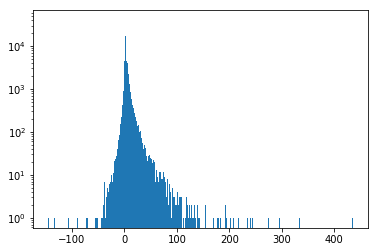

In [21]:
# Histogram for total number of votes at 2:00

n_bins = 580
x = comments_df['2:00 score']

plt.hist(x, bins = n_bins)
plt.yscale('log')
plt.show()

In [9]:
# This function takes the 2:00 score, and subtracts the last score amount
# before scores were publically revealed.
def delta_score(row):
    if row['amount of minutes the scores were hidden'] == 0:
        return row['2:00 score']
    elif row['amount of minutes the scores were hidden'] == 30:
        return row['2:00 score'] - row['0:30 score']
    elif row['amount of minutes the scores were hidden'] == 60:
        return row['2:00 score'] - row['1:00 score']
    else:
        return 'NAN'

In [10]:
comments_df['delta scores'] = comments_df.apply(delta_score, axis=1)

In [19]:
# Need to eliminate the extremely high count scores. They disrupt the
# data for the "viral" scores.
x = Counter(comments_df['2:00 score'])
comments_counter_df = pd.DataFrame.from_dict(x, orient='index').reset_index()
comments_counter_df = comments_counter_df.rename(columns = {'index' : 'score', 0 : 'count'})
comments_counter_df = comments_counter_df.sort_values(by=['count'], ascending = False)
comments_counter_df.head()

,score,count
0,1,39762
2,2,17151
1,3,9512
3,0,4566
5,4,4370


In [23]:
a = comments_counter_df['count'].median()
b = comments_counter_df['count'].mean()

In [24]:
print(a)
print(b)

6.0
450.97767857142856
